<a href="https://colab.research.google.com/github/markefuller/CAP4630/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 4
UCF CAP 4630, Fall 2019
Mark Fuller, ma138035

# 0. General Concepts

## Basic Terms

![picture](https://drive.google.com/uc?id=1tyvN9ydUaO970PKmq0pgEg13Jz-bszgm)

**Artificial Intelligence (AI)** - AI is a very broad term but can be defined as the effort to automate intellectual tasks normally performed by humans. It can be categorized in four ways: Acting humanly; Thinking humanly; Thinking rationaly; and Acting rationally. A process is rational if it always does the right thing based on the current information, given an ideal performance measure. Current development in AI centers around weak AI and strong AI. An example of weak AI is reactive machines that have no memory or experience upon which to base a decision, but instead rely on pure computational power and smart algorithms to recreate every decision every time. Strong AI involves relying on a small amount of memory and using that memory to avoid recalculating the descision when presented with a problem that has been seen before. 

**Machine Learning (ML)** - Machine learning is a subset of Artificial Intelligence. It attempts to embrace the aspect of how learning in accomplished in the broader AI field. In traditional programming, rules or algorithms along with data is processed by code to produce answers. In machine learning, large volumes of data along with labels that represent the answers are given to machine learning model for training. Training uses statistics to build a mathematical model relying on patterns and inference to make predictions on data not used during training. 

![picture](https://drive.google.com/uc?id=1WFy1JX_Mx2SuUsbkb4rESluHkmCU6VgU)

**Deep Learning** - Deep learning is a subset of machine learning that uses models based on artificial neural networks. It processes data using
computing units, called neurons, arranged into ordered sections, called layers. These models use multiple layers to progressively extract higher level features from the raw input in order to make predictions. One major distinguishing factor between deep learning and machine learning is that deep learning doesn't require humans to perform any feature creation activities. Deep learning uses its many layers to define its own best features.



## Learning Styles

There are four learning styles used with machine learning. They are:


1.   **Supervised learning -** All of the input data is labeled and has a specific expected result. The result could be a numeric value such as the price of a house, or a qualitative variable such as a class or tag.
2.   **Unsupervised learning -** the input data is not labelled and the results are not known. The goals of this type of learning are often to identify unknown patterns or group similar data (clustering)   
3.   **Self-supervised learning -** similar to supervised learning, but all of the input data does not have to be labeled. There can be a mixture of labeled and unlabeled data, and the network could ignore the labels provided. 
4.   **Reinforcement learning -** an extension of self-supervised learning that adds a feedback loop giving positive feedback when the solution performs its task correctly and negative feedback when it fails at its task.



# 1. Building a Model

## Structure of a Convent

Although the computing units of deep learning are called neurons which were modeled from neurobiology, deep learning models are not models of the brain and is strictly a mathematical framework for learning representations of data. Various types of data (Images, Text, Sound, etc.) are inputs to a convolutional neural network (Convent) for processing. This is depicted in the following diagram:

![picture](https://drive.google.com/uc?id=1FvfM8-lYRwV2pH2XT82wd3-syaouptgn)

Each layer in the network transforms the input into representations that are increasingly different from the original image and increasingly informative about the final result that allows for a good prediction of what it represents. Encoded within the layers are information leading to a valid prediction such as edges, corners, vertical lines, horizontal lines, etc. These features were not entered as input by humans. The layers of the network determined what it considers as important towards the goal of prediction.

## Components of a Convent

The components of a convolutional neural network consist of:


*   Layers - ordered sections of neurons that takes as input one or more tensors and outputs one or more tensors. Tensors are data stored in multidimensional Numpy arrays.
*   Input Data (X) - any information that can be expressed in a tensor. Common examples include images, video, text, sound, and tabular data.
*   Targets (Y) - the actual labels or identification of the input data for training or the prediction made on unknown or test data
*   Loss function - a measure of the distance between a prediction and its actual value used as a feedback signal for learning
*   Optimizer - an algorithm that implements backpropagation to adjust the weights of all layers so that the loss is minimized

The following diagram shows the relationship between the network, layers, loss function, and optimizer.

![picture](https://drive.google.com/uc?id=1Po3PyybcUlljl5C87BJYondyalfJhx0g)



## Outline of Machine Learning Process 

There are several steps to defining a neural network. These can be generalized as follows:


1.   Defining the problem and assembling a dataset
2.   Choosing a measure of success
3.   Deciding on an evaluation protocol
4.   Preparing your data
5.   Developing a model that does better than a baseline
6.   Scaling up: developing a model that overfits
7.   Regularizing your model and tuning your hyperparameters



## An Example Convolutional Neural Network (CNN)

The following steps are listed below in code cells to illustrate an example CNN. The steps are as follows:


1.   Acquire dataset
2.   Prepare data for training as needed by model
3.   Define the model
4.   Compile the model
5.   Evaluate the model
6.   Visualize the results



## Defining a Model

Keras is model-level library providing an easy interface for defining the components of a deep learning network. It does not handle the low level tensor manipulation and differentiation mathematics. Those functions are defined by a tensor library such as Tensorflow, Theano, and CNTK. 

An example CNN follows:

In [1]:
# Step 1) Acquire Dataset
%tensorflow_version 1.x
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [0]:
# Step 2) Prepare Data for Training Model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
input_shape = (28, 28, 1)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Prepare labels if needed for Training Model - one hot encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# Step 3) Define the Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Layers

Layers are ordered sections of neurons that takes as input one or more tensors and outputs one or more tensors. Deep learning models typically have many layers in them, sometimes hundreds of layers. The Keras framework provides different types of layers that can be used to build a model. They include:



1.   **Core layers -** including Dense, Activation, Dropout, Flatten, Input, Reshape, Permute, RepeatVector, Lambda, ActivityRegularization, Masking, SpatialDropout1D, SpatialDropout2D, and SpatialDropout3D.
2.   **Convolutional layers -** including Conv1D, Conv2D, SeparableConv1D, SeparableConv2D, DepthwiseConv2D, Conv2DTranspose, Conv3D, Conv3DTranspose, Cropping1D, Cropping2D, Cropping3D, UpSampling1D, UpSampling2D, UpSampling3D, ZeroPadding1D, ZeroPadding2D, and ZeroPadding3D
3.   **Pooling layers -** including MaxPooling1D, MaxPooling2D, MaxPooling3D, AveragePooling1D, AveragePooling2D, AveragePooling3D, GlobalMaxPooling1D, GlobalMaxPooling2D, GlobalMaxPooling3D, GlobalAveragePooling1D, GlobalAveragePooling2D, and GlobalAveragePooling3D
4.   **Locally-connected layers -** including LocallyConnected1D and LocallyConnected2D.
5.   **Recurrent layers -** including RNN, SimpleRNN, GRU, LSTM, ConvLSTM2D, ConvLSTM2DCell, SimpleRNNCell, GRUCell, LSTMCell, CuDNNGRU, and CuDNNLSTM
6.   **Merge layers -** including Add, Subtract, Multiply, Average, Maximum, Minimum, Concatenate, and Dot
7.   **Activation layers -** including LeakyReLU, PReLU, ELU, ThresholdedReLU, Softmax, and ReLU
8.   **Normalization layers -** BatchNormalization
9.   **Noise layers -** including GaussianNoise, GaussianDropout, and AlphaDropout

The simple model defined above used a **Conv2D** to create a spatial convolution window of size 3x3 over the images of size 28x28. It then used a **MaxPooling2D** layer to down-sample the input reducing its dimensionality in part to help over-fitting. the model then used a **flatten** layer to convert the output of the convolutional part to a 1D feature vector which is needed by the classifier. The classifier portion of the network is composed of a **Dense** layer for the fully connected layer, a **dropout** layer to fight overfitting, and finally a **Dense** layer with the softmax activation function limiting the predictions to the number of classifications desired.

# 2. Compiling a Model

## Optimizers

An optimizer is one of the two arguments required for compiling a Keras model. It is the mechanism through which the network will update itself based on the data it sees and its loss function. It implements a specific variant of stochastic gradient descent (SGD). There are many different optimizers supported by the Keras framework. They include:


1.   **Adagrad -** Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the learning rate. It is recommended to leave the parameters of this optimizer at their default values.
2.   **Adadelta -** Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done. 
3.   **RMSprop -** Divides the gradient by a running average of its recent magnitude. It is recommended to leave the parameters of this optimizer at their default values (except the learning rate, which can be freely tuned).
4.   **Adam - ** An algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.
5.   **Adamax -** It is a variant of Adam based on the infinity norm.
6.   **Nadam -** Nesterov Adam optimizer, much like Adam, is essentially RMSprop with momentum, Nadam is RMSprop with Nesterov momentum. It is recommended to leave the parameters of this optimizer at their default values.
7.   **SGD -** Stochastic gradient descent optimizer which includes support for momentum, learning rate decay, and Nesterov momentum.




## Loss Function

A loss function (or objective function, or optimization score function) is one of the two parameters required to compile a model. It represents how the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction. There are many loss functions provided by the Keras framework. They include:


1.   **mean_squared_error**
2.   **mean_absolute_error**
3.   **mean_absolute_percentage_error**
4.   **mean_squared_logarithmic_error**
5.   **squared_hinge**
6.   **hinge**
7.   **categorical_hinge**
8.   **logcosh**
9.   **huber_loss**
10.  **categorical_crossentropy**
11.  **sparse_categorical_crossentropy**
12.  **binary_crossentropy**
13.  **kullback_leibler_divergence**
14.  **poisson**
15.  **cosine_proximity**
16.  **is_categorical_crossentropy**




## Metrics

A metric is a function that is used to judge the performance of your model. it is usually specified in the compilation of a model, but it not a required parameter. A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function. Additional metric functions provided by the Keras framework include:


1.   **accuracy**
2.   **binary_accuracy**
3.   **categorical_accuracy**
4.   **sparse_categorical_accuracy**
5.   **top_k_categorical_accuracy**
6.   **sparse_top_k_categorical_accuracy**
7.   **cosine_proximity**
8.   **clone_metric**
9.   **clone_metrics**

It is also possible to create custom metric function instead of using the functions supplied by Keras. The next code cell shows compilation of a model using the two required parameters and the optional metrics parameter.



In [0]:
# Step 4) Compile the Model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

# 3. Training a Model

## Underfitting

Underfitting is the inability of the model to predict well the labels of the data it was trained on. The most common causes are:


1.   The model is too simple for the data
2.   The features are not informative enough
3.   There is not enough data to train on

In deep learning, a simple solution for underfitting is to add additional layers to the model provided that there is sufficient data to train on.



## Overfitting

Overfitting is a central problem of machine learning. It is when the model contains more parameters than can be justified by the data. It results in a network model performing excellent on the training data, but unable to replicate the accuracy on test data. There are several methods to combat overfitting. They include:


1.   Reduce the networks size by lowering the trainable parameters. 
2.   Adding weight regularization by forcing the model to only use small values for its weights which makes the distribution of weight values more regular.
3.   Adding dropout layers randomly drops out a number of output features of the layer during training
4.   Add more training data. 
5.   Data augmentation to create variance in the input data using techniques such as cropping, padding, horizontal flipping, rotating, zooming, and other methods. 

# Training

The next code cell shows an example of actually training a model.

In [10]:
# Step 5) Train the Model
epochs = 10
batch_size = 128
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images,test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 8s 139us/step - loss: 0.2803 - acc: 0.9181 - val_loss: 0.1034 - val_acc: 0.9693
Epoch 2/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.1063 - acc: 0.9683 - val_loss: 0.0700 - val_acc: 0.9780
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0713 - acc: 0.9784 - val_loss: 0.0566 - val_acc: 0.9823
Epoch 4/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0549 - acc: 0.9833 - val_loss: 0.0599 - val_acc: 0.9806
Epoch 5/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0435 - acc: 0.9864 - val_loss: 0.0540 - val_acc: 0.9836
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.0358 - acc: 0.9879 - val_loss: 0.0499 - val_acc: 0.9849
Epoch 7/10
60000/60000 [=

# Visualizing the Results of Training

After training a model, it is common to visualize the results of the training using graphs to plot losses and accuracies. It is also possible to produce representations of the inner workings of a model. 

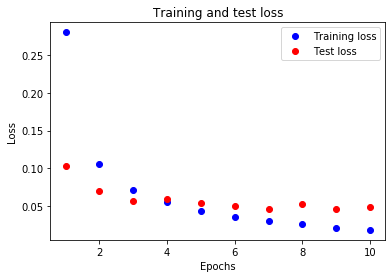

In [11]:
# Step 6) Visualizing the Results
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

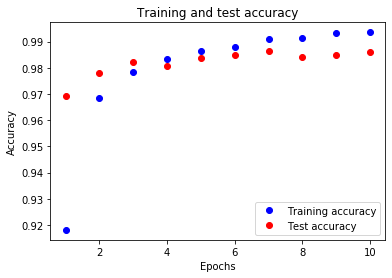

In [12]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# 4. Finetuning a Pretrained Model

Models can be built from scratch as the example above illustrated using the simple model with very few layers. As the number of layers increases, the time needed to train the model will also increase substanially. If massive clusters of GPU resources and RAM resources are not available, then it may be impractical to train very large datasets using very deep models. 

A common and highly effective approach to deep learning on small image datasets is to use a pretrained network. A pretrained network is a saved network that was previously trained on a large dataset, typically on a large-scale image classification task.

There are many pretrained networks available as part of the Keras framework. These include:


1.   Xception
2.   VGG16
3.   VGG19
4.   ResNet, ResNetV2
5.   InceptionV3
6.   InceptionResNetV2
7.   MobileNet
8.   MobileNetV2
9.   DenseNet
10.  NASNet 

A pretrained network consist of a trained convolutional base along with a trained classifier. A deeply trained convolutional base will have captured many aspects of the input data that can be generalized and used with a completely different classifier. For example, a pretrained network designed to classify images among 1000 different categories can be reused to detect objects it was never training on such as specific iamges of military tanks. 

This is accomplished by freezing the layers of the trained convolutional base so that backpropagation of the optimizer is not allowed to adjust the weights already learned. The trained classifier is then removed and a new classifier is added on top of the pretrained base. The new model is then trained, with adjustments only made to the classifier layers. 

If the results of the this new training is not sufficient, then the model can be fine tuned. This is accomplished by unfreezing the last few layers of the base model, and performing training again with more paramters able to be adjusted. The reason for not simply unfreezing all the layers is the computational resources (GPU, RAM) needed and the time it would take to train on deep layered models. 

